<a href="https://colab.research.google.com/github/toz015/LendingClub_project/blob/master/LendingClub_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lending club:**

In this project, I wish to present and explore the data provided by Lending Club.

**A breif introduction about LendingClub**:

LendingClub is an American peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission, and to offer loan trading on a secondary market. Customers can select loans to invest if their online application is qualified by LendingClub. The entire process is online, using technology to lower the cost of credit and pass the savings back in the form of lower rates for borrowers and solid returns for investors.

**The Goal of the project:**

I will present and explore the data provided by LC and build model to predict wheather the loan will be default in the future.

In [0]:
#@title Import packages
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
import time
from scipy.stats import randint as sp_randint
from sklearn import metrics
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

In [0]:
#@title Data Input
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
link = 'https://drive.google.com/open?id=1JD3mb6_KtkObI7bPwXd2I4fODoUkuqAD'
fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
file.GetContentFile('LoanStats3a.csv') 
Total_dataset = pd.read_csv('LoanStats3a.csv', skiprows= [0])
Total_dataset.head(2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
0,NaN,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,NaN,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7%,9.0,f,0.0,0.0,5863.155187,5833.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,NaN,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4%,4.0,f,0.0,0.0,1014.530000,1014.53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Here is a full description of every fields:

LoanStatNew	 | Description
--- | ---
zip_code	|The first 3 numbers of the zip code provided by the borrower in the loan application.
addr_state	|The state provided by the borrower in the loan application
annual_inc|	The annual income provided by the borrower during registration.
collection_recovery_fee |	post charge off collection fee
collections_12_mths_ex_med |	Number of collections in 12 months excluding medical collections
delinq_2yrs	|The number of 30+ days past-due incidences of delinquency in the borrower’s credit file for the past 2 years
desc |	Loan description provided by the borrower
dti	| A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.
earliest_cr_line	|The month the borrower’s earliest reported credit line was opened
emp_length|	Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
emp_title|	The job title supplied by the Borrower when applying for the loan.
fico_range_high	|The upper boundary of range the borrower’s FICO belongs to.
fico_range_low|	The lower boundary of range the borrower’s FICO belongs to.
funded_amnt |	The total amount committed to that loan at that point in time.
funded_amnt_inv|	The total amount committed by investors for that loan at that point in time.
grade |	LC assigned loan grade
home_ownership|	The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.
id |	A unique LC assigned ID for the loan listing.
initial_list_status |	The initial listing status of the loan. Possible values are – W, F
inq_last_6mths |	The number of inquiries by creditors during the past 6 months.
installment	| The monthly payment owed by the borrower if the loan originates.
int_rate |	Interest Rate on the loan
is_inc_v |	Indicates if income was verified by LC, not verified, or if the income source was verified
issue_d	 | The month which the loan was funded
last_credit_pull_d |	The most recent month LC pulled credit for this loan
last_fico_range_high |	The last upper boundary of range the borrower’s FICO belongs to pulled.
last_fico_range_low |	The last lower boundary of range the borrower’s FICO belongs to pulled.
last_pymnt_amnt	| Last total payment amount received
last_pymnt_d |	Last month payment was received
loan_amnt |	The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
loan_status |	Current status of the loan
member_id |	A unique LC assigned Id for the borrower member.
mths_since_last_delinq	| The number of months since the borrower’s last delinquency.
mths_since_last_major_derog	| Months since most recent 90-day or worse rating
mths_since_last_record |	The number of months since the last public record.
next_pymnt_d	| Next scheduled payment date
open_acc	| The number of open credit lines in the borrower’s credit file.
out_prncp |	Remaining outstanding principal for total amount funded
out_prncp_inv	| Remaining outstanding principal for portion of total amount funded by investors
policy_code |	Publicly available policy_code=1, new products not publicly available policy_code=2
pub_rec	|Number of derogatory public records
purpose	| A category provided by the borrower for the loan request.
pymnt_plan |	Indicates if a payment plan has been put in place for the loan
recoveries |	post charge off gross recovery
revol_bal |	Total credit revolving balance
revol_util|	Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
sub_grade |	LC assigned loan subgrade
term	| The number of payments on the loan. Values are in months and can be either 36 or 60.
title |	The loan title provided by the borrower
total_acc	| The total number of credit lines currently in the borrower’s credit file
total_pymnt	|Payments received to date for total amount funded
total_pymnt_inv |	Payments received to date for portion of total amount funded by investors
total_rec_int	| Interest received to date
total_rec_late_fee|	Late fees received to date
total_rec_prncp	| Principal received to date
url	| URL for the LC page with listing data.

In [0]:
Total_dataset.columns.value_counts
#We have 137 variable

<bound method IndexOpsMixin.value_counts of Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_amount', 'hardship_start_date', 'hardship_end_date',
       'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
       'hardship_loan_status', 'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount'],
      dtype='object', length=137)>

In [0]:
Total_dataset.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,url,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,...,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,0.0,42535.000000,42535.000000,42535.000000,42535.000000,4.253100e+04,0.0,42535.000000,42506.000000,42506.000000,15609.000000,3651.000000,42506.000000,42506.000000,4.253500e+04,42506.000000,42535.0,42535.0,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42535.000000,42390.0,0.0,42535.0,0.0,0.0,0.0,42506.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41170.000000,42430.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,11089.722581,10821.585753,10139.830603,322.623063,6.913656e+04,NaN,13.373043,0.152449,1.081424,35.017618,59.175568,9.343951,0.058156,1.429786e+04,22.124406,0.0,0.0,12019.008452,11311.863076,9675.675936,2239.981444,1.516890,101.834275,14.175519,2613.245652,0.0,NaN,1.0,NaN,NaN,NaN,0.000094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045227,0.000024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,7410.938391,7146.914675,7131.686447,208.927216,6.409635e+04,NaN,6.726315,0.512406,1.527455,22.418427,47.145396,4.496274,0.245713,2.201844e+04,11.592811,0.0,0.0,9094.162826,9038.151775,7105.750304,2585.057393,7.830064,729.079054,161.179281,4385.066535,0.0,NaN,0.0,NaN,NaN,NaN,0.009700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.208737,0.004855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,500.000000,500.000000,0.000000,15.670000,1.896000e+03,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,5200.000000,5000.000000,4950.000000,165.520000,4.000000e+04,NaN,8.200000,0.000000,0.000000,17.000000,0.000000,6.000000,0.000000,3.635000e+03,13.000000,0.0,0.0,5464.404074,4792.255000,4400.000000,657.100000,0.000000,0.000000,0.000000,211.050000,0.0,NaN,1.0,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,9700.000000,9600.000000,8500.000000,277.690000,5.900000e+04,NaN,13.470000,0.000000,1.000000,33.00000

In [0]:
Total_dataset.shape

(42538, 137)

In [0]:
#@title Data Exploaring and cleaning
Dataset_T = Total_dataset.dropna(axis=1, how="all")
# Drop columns with ALL missing values
Dataset_T = Dataset_T.dropna(axis=0, how="all")
#Drop rows with all missing values 
# Omit this col if all the value are None

In [0]:
# There are several variables only have less than half data points among the observations, therefore I would like to omnit them
# I also drop the feature which can not be generated when client submit the application at the first time, e.g total_pymnt  etc.
Dataset_T = Dataset_T.drop(columns = [ "id", "next_pymnt_d", "desc", "mths_since_last_delinq", "mths_since_last_record", "chargeoff_within_12_mths","recoveries",  "total_pymnt", "last_pymnt_amnt"])
Dataset_T.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 42538 entries, 0 to 42537
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   42535 non-null  float64
 1   funded_amnt                 42535 non-null  float64
 2   funded_amnt_inv             42535 non-null  float64
 3   term                        42535 non-null  object 
 4   int_rate                    42535 non-null  object 
 5   installment                 42535 non-null  float64
 6   grade                       42535 non-null  object 
 7   sub_grade                   42535 non-null  object 
 8   emp_title                   39909 non-null  object 
 9   emp_length                  41423 non-null  object 
 10  home_ownership              42535 non-null  object 
 11  annual_inc                  42531 non-null  float64
 12  verification_status         42535 non-null  object 
 13  issue_d                     425

Overall, we have 7189 observations. There are serveral variables have missing data. There are over half of obs did not have mths_since_last_record and mths_since_last_deling. Here I would like to drop this two variables at first. Then let's take closer look to the other variables


In [0]:
#@title Fill missing data by randomly select one number from that col
import random
def randomiseMissingData(df):
  df2 = df.copy()
  for col in df2.columns:
    data = df2[col]
    mask = data.isnull()
    samples = random.choices(data[~mask].values, k = mask.sum() )
    data[mask] = samples
  return df2

Dataset_T1 = randomiseMissingData(Dataset_T)
Dataset_T1.isnull().sum().sum()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


0

In [0]:
def checkUnique(df):
  colList = []
  for col in df.columns:
    if df[col].dtype == np.object and len(df[col].unique()) > df.shape[0] * 0.7:
      colList.append(col)
  return colList
colList = checkUnique(Dataset_T1)

Dataset_T1 = Dataset_T1.drop(columns = colList)
# Here I also drop emp_title col since almost every observation has a different employ title than others, maybe later we can classfiy them into several large group. But now I choose to drop this column

In [0]:
# I omit variables only have one distinct value.
Dataset_T1 = Dataset_T1.drop(columns = ["out_prncp",	"out_prncp_inv", "collections_12_mths_ex_med", "hardship_flag", "title", "total_rec_int", "funded_amnt_inv","total_rec_late_fee"])

In [0]:
Dataset_T1.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'total_pymnt_inv', 'total_rec_prncp', 'collection_recovery_fee',
       'last_pymnt_d', 'last_credit_pull_d', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')>

In [0]:
# removing policy_code == 2, i.e. "not public" and then removing the comlumn
Dataset_T1 = (Dataset_T1[Dataset_T1.policy_code != 2]).drop(columns = ["policy_code"])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[Text(0.5, 0, 'loan_amnt'),
 Text(1.5, 0, 'funded_amnt'),
 Text(2.5, 0, 'installment'),
 Text(3.5, 0, 'annual_inc'),
 Text(4.5, 0, 'dti'),
 Text(5.5, 0, 'delinq_2yrs'),
 Text(6.5, 0, 'inq_last_6mths'),
 Text(7.5, 0, 'open_acc'),
 Text(8.5, 0, 'pub_rec'),
 Text(9.5, 0, 'revol_bal'),
 Text(10.5, 0, 'total_acc'),
 Text(11.5, 0, 'total_pymnt_inv'),
 Text(12.5, 0, 'total_rec_prncp'),
 Text(13.5, 0, 'collection_recovery_fee'),
 Text(14.5, 0, 'acc_now_delinq'),
 Text(15.5, 0, 'delinq_amnt'),
 Text(16.5, 0, 'pub_rec_bankruptcies'),
 Text(17.5, 0, 'tax_liens')]

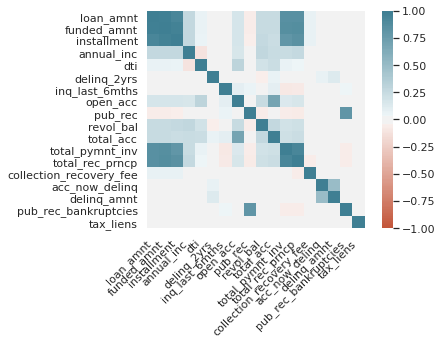

In [0]:
#@title Heatmap show correlation among the varaibles
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

numCol = []
for col in Dataset_T1:
  if Dataset_T1[col].dtype == np.float:
    numCol.append(col)
corr = Dataset_T1[numCol].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

The plot above shows the correlation among these variables. The blue means these two variables are strong positive correlated to each other, and the red color represents negative relation. Here we can see there are several variables strongly related to each other. Here I drop some of them to avoid multicollinearity.

In [0]:

Dataset_T1 = Dataset_T1.drop(columns = ["funded_amnt","installment",  "total_pymnt_inv", "total_rec_prncp", "collection_recovery_fee" ])

In [0]:
# Labeling the response variable

Dataset_T1["loan_status"] =  [1 if x in ["Fully Paid", "Does not meet the credit policy. Status:Fully Paid"] else 0 for x in Dataset_T1["loan_status"] ]


In [0]:
Dataset_Tree = Dataset_T1

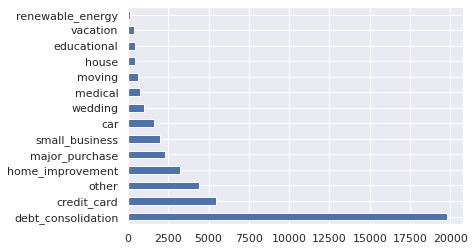

In [0]:
#  Most people take loan for debt_cosolidation. I will combine other purpose category into "other" category
Dataset_T1["purpose"].value_counts()[:20].plot(kind='barh')
def purpose(row):
  if row["purpose"] in ["credit_card","debt_consolidation"]:
    return "debt"
  elif row["purpose"] in ["house", "home_improvement", "moving", "renewable_energy"]:
    return "house"
  else:
    return "other"
Dataset_Tree["purpose"] = Dataset_Tree.apply(purpose, axis = 1)


In [0]:
df_location = Dataset_Tree.groupby("addr_state",).sum().reset_index()
df_location = df_location.filter(["addr_state", "loan_amnt"], axis = 1)

In [0]:
#@title The total amount issued from different states
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=df_location['addr_state'], # Spatial coordinates
    z = df_location['loan_amnt'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = 'Total amount issued by State',
    geo_scope='usa', # limited map scope to USA
)

fig.show()

The plot above shows the total amount issued from different states. It is obviously California and New York are the top 2 states which have higher loan amount than the other states. It totally make sense since people who live in these two area suffer from the high economy pressure from renting and living cost.

In [0]:
Dataset_Tree = Dataset_Tree.drop("zip_code", axis = 1)
Dataset_Tree = Dataset_Tree.drop("loan_amnt", axis = 1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

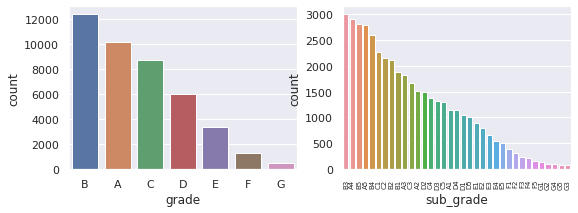

In [0]:
plt.figure(figsize=(9, 3))
  
plt.subplot(1, 2, 1)
sns.countplot(x="grade", data= Dataset_Tree, order = Dataset_Tree['grade'].value_counts().index)
plt.subplot(1, 2, 2)
sns.countplot(x="sub_grade", data= Dataset_Tree, order = Dataset_Tree['sub_grade'].value_counts().index)
plt.xticks(rotation = 90, fontsize = 7)

The distribution of sub grade population is similar to the grade one, here I would like to drop sub grade variable.

In [0]:
Dataset_Tree = Dataset_Tree.drop("sub_grade", axis = 1)

In [0]:
Dataset_Tree["annual_inc"] = Dataset_Tree["annual_inc"].astype("float")

In [0]:
# convert string variable to percentage 
def convert_percentage(df):
  colist = ["int_rate", "revol_util"]
  for col in colist:
    df[col] = df[col].str.rstrip('%').astype('float') / 100.0
  return df
Dataset_Tree = convert_percentage(Dataset_Tree)

In [0]:
# We could analysis loan data from time aspect, but right now I would like to drop these variables
Dataset_Tree = Dataset_Tree.drop(columns = ["issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d"], axis = 1)

In [0]:
# encoding the categorical variables by one hot encoding 
bin_col = []
for col in Dataset_Tree.columns.values.tolist():
 if Dataset_Tree[col].dtype != np.float and Dataset_Tree[col].dtype != np.int:
   bin_col.append(col)

df_tree = pd.get_dummies(Dataset_Tree, columns = bin_col)

In [0]:
#@title Random Forest Model
# Labels are the values we want to predict

labels = np.array(df_tree['loan_status'])
features= df_tree.drop('loan_status', axis = 1)
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [0]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (31903, 109)
Training Labels Shape: (31903,)
Testing Features Shape: (10635, 109)
Testing Labels Shape: (10635,)


In [0]:
feature_col  = list(features.columns.values)

In [0]:
train_features


,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,emp_length_1 year,emp_length_10+ years,emp_length_2 years,emp_length_3 years,emp_length_4 years,emp_length_5 years,emp_length_6 years,emp_length_7 years,emp_length_8 years,emp_length_9 years,emp_length_< 1 year,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,...,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f,application_type_INDIVIDUAL
3661,0.1758,160000.0,14.83,0.0,0.0,17.0,0.0,31957.0,0.701,54.0,0.0,0.0,0.0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
20205,0.1111,21840.0,23.63,0.0,2.0,13.0,0.0,4409.0,0.179,17.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
19993,0.0766,78000.0,23.29,0.0,0.0,8.0,0.0,55132.0,0.753,25.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
14539,0.0699,61200.0,18.76,0.0,1.0,17.0,0.0,11394.0,0.164,30.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
16227,0.1677,57000.0,12.27,0.0,0.0,8.0,0.0,17205.0,0.956,36.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,0.1171,50000.0,16.68,0.0,1.0,7.0,0.0,5759.0,0.800,27.0,0.0,0.0,0.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
11284,0.1599,70000.0,13.85,1.0,0.0,12.0,0.0,6129.0,0.696,23.0,0.0,0.0,0.0,0.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
38158,0.0800,42108.0,23.88,0.0,2.0,10.0,0.0,634.0,0.144,20.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
860,0.1427,42000.0,11.09,0.0,1.0,12.0,0.0,1086.0,0.093,19.0,0.0,0.0,0.0,0.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [0]:
#@title Build performance functions
def ROC_Curve(rf, auc, X_train, y_train, X_test, y_test, model_name):
    rf_fit = rf.fit(X_train, y_train)
    y_predicted = rf.predict_proba(X_test)[:, 1]
    false_positive, true_positive, _ = roc_curve(y_test, y_predicted)

    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(false_positive, true_positive, color='darkorange', label= model_name)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve (area = %0.2f)' % auc)
    plt.legend(loc='best')
    plt.show()


def Report_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


def Print_confusion_matrix(cm, auc, heading):
    print('\n', heading)
    print(cm)
    true_negative  = cm[0,0]
    true_positive  = cm[1,1]
    false_negative = cm[1,0]
    false_positive = cm[0,1]
    total = true_negative + true_positive + false_negative + false_positive
    accuracy = (true_positive + true_negative)/total
    precision = (true_positive)/(true_positive + false_positive)
    recall = (true_positive)/(true_positive + false_negative)
    misclassification_rate = (false_positive + false_negative)/total
    F1 = (2*true_positive)/(2*true_positive + false_positive + false_negative)
    print('accuracy.................%7.4f' % accuracy)
    print('precision................%7.4f' % precision)
    print('recall...................%7.4f' % recall)
    print('F1.......................%7.4f' % F1)
    print('auc......................%7.4f' % auc)

def Plot_predictor_importance(best_model, feature_columns):
    feature_importances = best_model.feature_importances_
    sorted_idx = np.argsort(feature_importances)
    top5 = feature_importances[sorted_idx][-5:]
    y_pos  = np.arange(5) + .5
    fig, ax = plt.subplots()
    ax.barh(y_pos, 
            top5 , 
            align='center', 
            color='green', 
            ecolor='black', 
            height=0.5)
    ax.set_yticks(y_pos)
    ax.set_yticklabels([feature_col[i] for i in list(sorted_idx[-5:])])
    ax.invert_yaxis()
    ax.set_xlabel('Relative Importance')
    ax.set_title('Top 5 Predictor Importance')
    plt.show()


In [0]:
#@title Train RF model 
def Random_Search(X_train, y_train, X_test, y_test, feature_columns):
    global best_model, saved_model
    param_grid = {"n_estimators": range(5, 20, 2),
              "max_depth": range(4, 30, 2),
              "min_samples_leaf": range(2, 100, 2),
              "max_features": sp_randint(1, len(feature_col)),
              "min_samples_split": sp_randint(2, 10),
              "bootstrap": [False],
              "criterion": ["gini", "entropy"]}
    clf = RandomForestClassifier(class_weight = 'balanced')
    n_iter_search = 20
    estimator = RandomizedSearchCV(clf,
                                   param_distributions = param_grid,
                                   n_iter = n_iter_search,
                                   scoring = 'roc_auc',
                                   verbose = 0,
                                   n_jobs = 1)
        
    fit = estimator.fit(X_train, y_train)

    # Cross validation with 20 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv_ = ShuffleSplit(n_splits = 20, test_size = 0.20, random_state = 0)
     
    Report_scores(estimator.cv_results_, n_top = 3)
    
    best_model = estimator.best_estimator_
    print('\nbest_model:\n', best_model)

    y_predicted = best_model.predict(X_train)
    probabilities = best_model.predict_proba(X_train)

    c_report = classification_report(y_train, y_predicted)
    print('\nClassification report:\n', c_report)

    y_predicted_train = best_model.predict(X_train)
    cm = confusion_matrix(y_train, y_predicted_train)
    auc = roc_auc_score(y_train, y_predicted_train)
    Print_confusion_matrix(cm, auc, 'Confusion matrics of the training dataset')

    y_predicted = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted)
    auc = roc_auc_score(y_test, y_predicted)

    ntotal = len(y_test)
    correct = y_test == y_predicted
    numCorrect = sum(correct)
    percent = round( (100.0*numCorrect)/ntotal, 6)
    print("\nCorrect classifications on test data: {0:d}/{1:d} {2:8.3f}%".format(numCorrect, ntotal, percent))
    prediction_score = 100.0*best_model.score(X_test, y_test)
    print('Random Forest Prediction Score on test data: %8.3f' % prediction_score)

    Plot_predictor_importance(best_model, feature_columns)

    y_predicted_test = best_model.predict(X_test)
    cm = confusion_matrix(y_test, y_predicted_test)
    auc = roc_auc_score(y_test, y_predicted_test)
    Print_confusion_matrix(cm, auc, 'Confusion matrics of the test dataset')
    ROC_Curve(best_model, auc, X_train, y_train, X_test, y_test, "Random Forest" )


Model with rank: 1
Mean validation score: 0.693 (std: 0.009)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 20, 'max_features': 12, 'min_samples_leaf': 30, 'min_samples_split': 5, 'n_estimators': 17}

Model with rank: 2
Mean validation score: 0.692 (std: 0.008)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': 10, 'max_features': 25, 'min_samples_leaf': 54, 'min_samples_split': 3, 'n_estimators': 15}

Model with rank: 3
Mean validation score: 0.690 (std: 0.010)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 6, 'max_features': 52, 'min_samples_leaf': 36, 'min_samples_split': 2, 'n_estimators': 15}


best_model:
 RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features=12,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_sampl

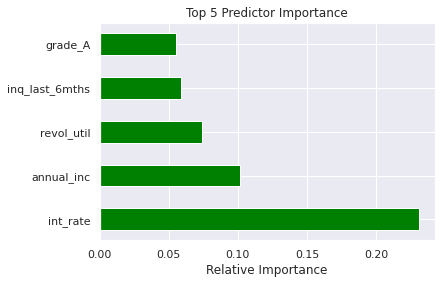


 Confusion matrics of the test dataset
[[ 973  642]
 [2860 6160]]
accuracy................. 0.6707
precision................ 0.9056
recall................... 0.6829
F1....................... 0.7787
auc...................... 0.6427


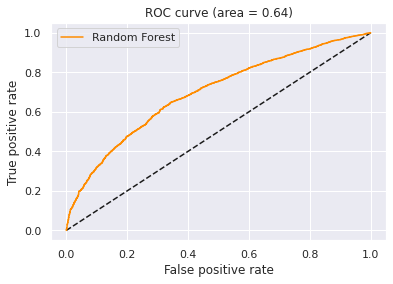

In [0]:
Random_Search(train_features, train_labels, test_features, test_labels,  feature_col)

Over 62% of loan default be correctly predicted which is quite impressive since the default is the minority in the dataset.

In [0]:
Data_NL = Dataset_T1

In [0]:
#@title Data Cleaning / Integration for NL model
Data_NL = Data_NL.drop(columns = ["zip_code", "issue_d", "earliest_cr_line", "last_pymnt_d", "last_credit_pull_d", "initial_list_status"])
Data_NL["annual_inc"] = Data_NL["annual_inc"].astype("float")
Data_NL = convert_percentage(Data_NL)

In [0]:
class_mapping = {label:idx for idx, label in enumerate(np.unique(Data_NL['term']))}
Data_NL['term']=Data_NL['term'].map(class_mapping)
class_mapping = {label:idx for idx, label in enumerate(np.unique(Data_NL['grade']))}
Data_NL['grade']=Data_NL['grade'].map(class_mapping)
class_mapping = {label:idx for idx, label in enumerate(np.unique(Data_NL['home_ownership']))}
Data_NL['home_ownership']=Data_NL['home_ownership'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Data_NL['verification_status']))}
Data_NL['verification_status']=Data_NL['verification_status'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Data_NL['purpose']))}
Data_NL['purpose']=Data_NL['purpose'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Data_NL['addr_state']))}
Data_NL['addr_state']=Data_NL['addr_state'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Data_NL['loan_status']))}
Data_NL['loan_status']=Data_NL['loan_status'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Data_NL['emp_length']))}
Data_NL['emp_length']=Data_NL['emp_length'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Data_NL['application_type']))}
Data_NL['application_type']=Data_NL['application_type'].map(class_mapping)

class_mapping = {label:idx for idx, label in enumerate(np.unique(Data_NL['pymnt_plan']))}
Data_NL['pymnt_plan']=Data_NL['pymnt_plan'].map(class_mapping)


class_mapping = {label:idx for idx, label in enumerate(np.unique(Data_NL['sub_grade']))}
Data_NL['sub_grade']=Data_NL['sub_grade'].map(class_mapping)

In [0]:
#@title Split files
from sklearn.model_selection import train_test_split
yPredict = Data_NL.loan_status
XClean = Data_NL.drop(["loan_status"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(XClean, yPredict, random_state=42, test_size=.30)


In [0]:
#@title Nueral network modeling 
from sklearn.preprocessing import StandardScaler
Dataset_Tree
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

predictions = mlp.predict(X_test)
print(confusion_matrix(y_test,predictions))

print(classification_report(y_test,predictions))

[[  162  1761]
 [  437 10402]]
              precision    recall  f1-score   support

           0       0.27      0.08      0.13      1923
           1       0.86      0.96      0.90     10839

    accuracy                           0.83     12762
   macro avg       0.56      0.52      0.52     12762
weighted avg       0.77      0.83      0.79     12762



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



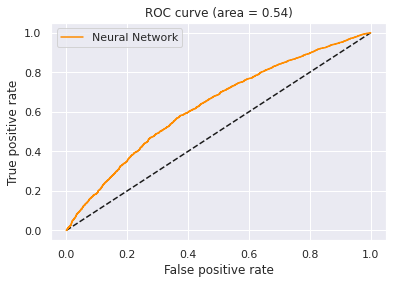

In [0]:
auc = roc_auc_score(y_test, predictions)
ROC_Curve(mlp, auc, X_train, y_train, X_test, y_test,"Neural Network" )


Comparing these two models. Random forestd did better jobs to predict default loan.

# Summary
In this project, I analyzed the loan data from LendingClub.

Loans default will cause huge loss for the banks, so they pay much attention on this issue and apply various method to detect and predict default behaviours of their customers. I am interested in how to predict whether a loan will default. With the provided data, I will work on loan behaviours prediction using machine learning models.

To achieve my goal, I analyzed the data by python mainly by perfoming data cleaning,processing and finally, visulization. From which, I learnt that california and New York are two states which issued the most loan amount. Most people take loan for debt_cosolidation. In addtion, I applied Neural Network model and Random forest model to predict whether a loa will default. The Random forest model outperformed than Neural Network model by geting higher recall and AUC-ROC score. According to the feature importance which generated by RF model. The Interest Rate on the loan is one of the most importance feature, which is not suprise me since a loan that is considered high risk has a higher interest rate. Over 63% of the defaults be identified by random forest model which is quite impressive. In this way, banks can detect the default behaviours in the earlier stage and conduct the corresponding actions to reduce the possible loss.
